# Introduction to Spatial Data Analysis in Python 

In [1]:
import os, sys, glob
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# vector / visualisation packages
import geopandas as gpd
import geoplot as gplt
import mapclassify as mc
import geoplot.crs as gcrs
from earthpy import clip as cl

# raster packages
import rasterio as rio
import georasters as gr
from rasterstats import zonal_stats

# spatial econometrics 
import pysal as ps
import esda
import libpysal as lps

from libpysal.weights import Queen, Rook, KNN

# Vector data 

From [Natural Earth](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/110m_cultural.zip)

In [3]:
cities = gpd.read_file("data/ne_110m_populated_places.zip")

In [4]:
countries = gpd.read_file('data/ne_110m_admin_0_countries.zip')

In [5]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,Vaduz,1,None,...,None,None,None,None,None,None,None,None,None,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,Lobamba,0,Legislative and,...,None,None,None,None,None,None,None,None,None,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,None,...,None,None,None,None,None,None,None,None,None,POINT (6.13000 49.61166)


## Constructing Geodataframe from lon-lat 

In [7]:
df = pd.DataFrame({'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
lat_am_capitals = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude))

## Making Maps

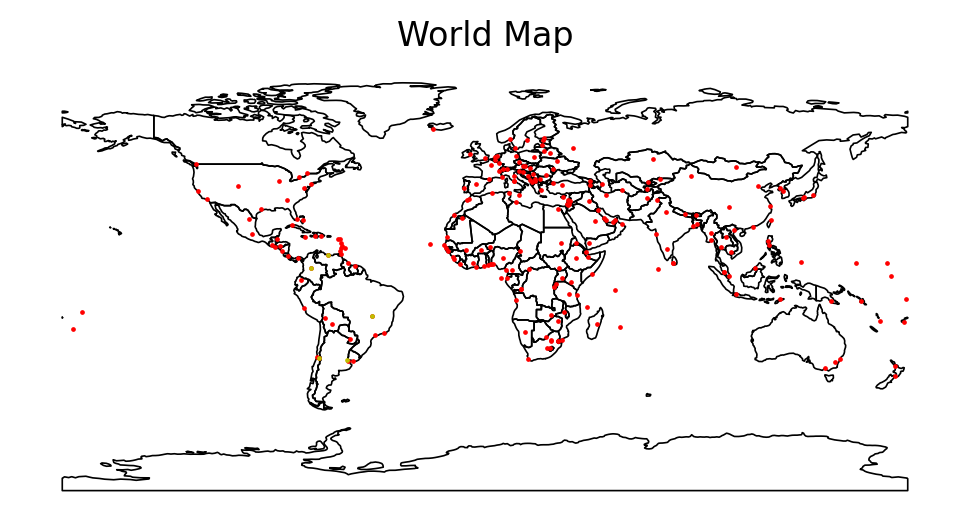

In [8]:
f, ax = plt.subplots(dpi = 200)
countries.plot(edgecolor = 'k', facecolor = 'None', linewidth = 0.6, ax = ax)
cities.plot(markersize = 0.5, facecolor = 'red', ax = ax)
lat_am_capitals.plot(markersize = 0.5, facecolor = 'y', ax = ax)
ax.set_title('World Map')
ax.set_axis_off()

## Static Webmaps

/home/alal/anaconda3/envs/geo_env/lib/python3.10/site-packages/geoplot/geoplot.py:708: UserWarning: Could not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  warnings.warn(


<GeoAxesSubplot:>

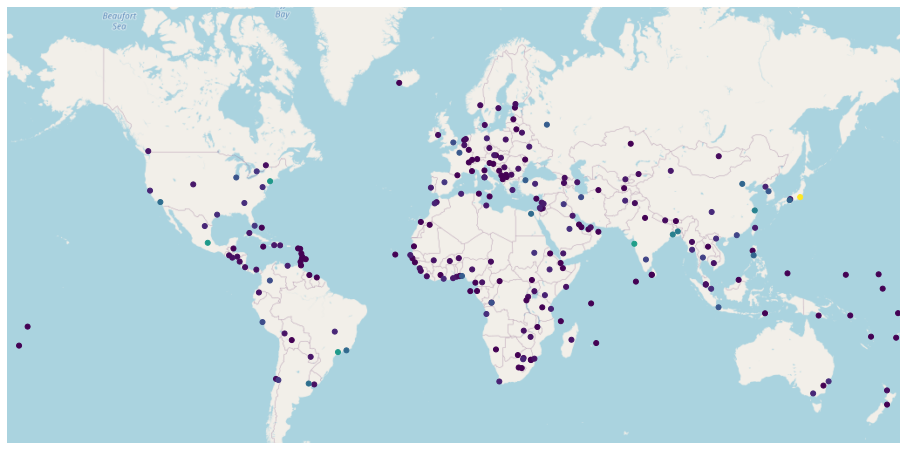

In [9]:
ax = gplt.webmap(countries, projection=gplt.crs.WebMercator(), figsize = (16, 12))
gplt.pointplot(cities, ax=ax, hue = 'POP2015')

## Projections

Map projections flatten a globe's surface onto a 2D plane. This necessarily distorts the surface (one of Gauss' lesser known results), so one must choose specific form of 'acceptable' distortion.

By convention, the standard projection in GIS is World Geodesic System(lat/lon - `WGS84`). This is a cylindrical projection, which stretches distances east-west and *results in incorrect distance and areal calculations*. For accurate distance and area calculations, try to use UTM (which divides map into zones). See [epsg.io](epsg.io)

In [10]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
countries_2 = countries.copy()
countries_2 = countries_2.to_crs({'init': 'epsg:3035'})

/home/alal/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


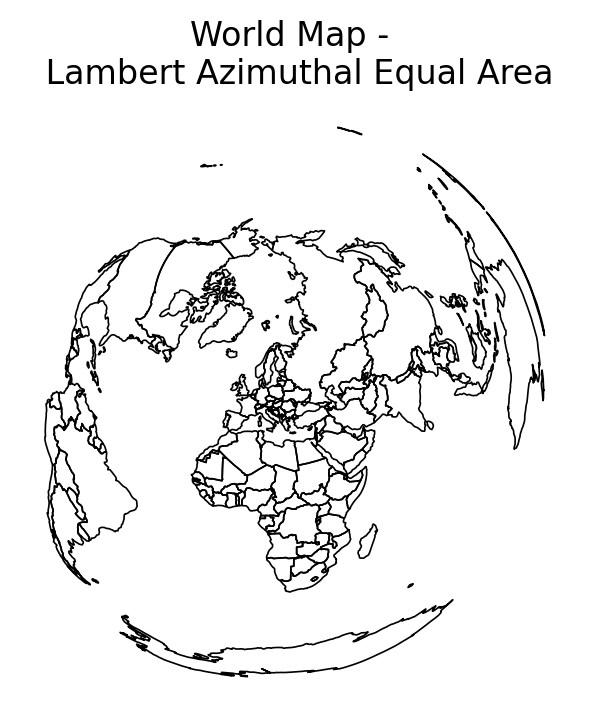

In [12]:
f, ax = plt.subplots(dpi = 200)
countries_2.plot(edgecolor = 'k', facecolor = 'None', linewidth = 0.6, ax = ax)
ax.set_title('World Map - \n Lambert Azimuthal Equal Area')
ax.set_axis_off()

## Choropleths

Maps with color-coding based on value in table

+ scheme=None—A continuous colormap.
+ scheme=”Quantiles”—Bins the data such that the bins contain equal numbers of samples.
+ scheme=”EqualInterval”—Bins the data such that bins are of equal length.
+ scheme=”FisherJenks”—Bins the data using the Fisher natural breaks optimization procedure.

(Example from geoplots gallery)

/tmp/ipykernel_164389/4086875051.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cali['area'] =cali.geometry.area
/tmp/ipykernel_164389/4086875051.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  scheme = mc.Quantiles(cali.area, k=5)
/tmp/ipykernel_164389/4086875051.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  scheme = mc.EqualInterval(cali.area, k=5)
/tmp/ipykernel_164389/4086875051.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

Text(0.5, 0.98, 'California State Districts by Area, 2010')

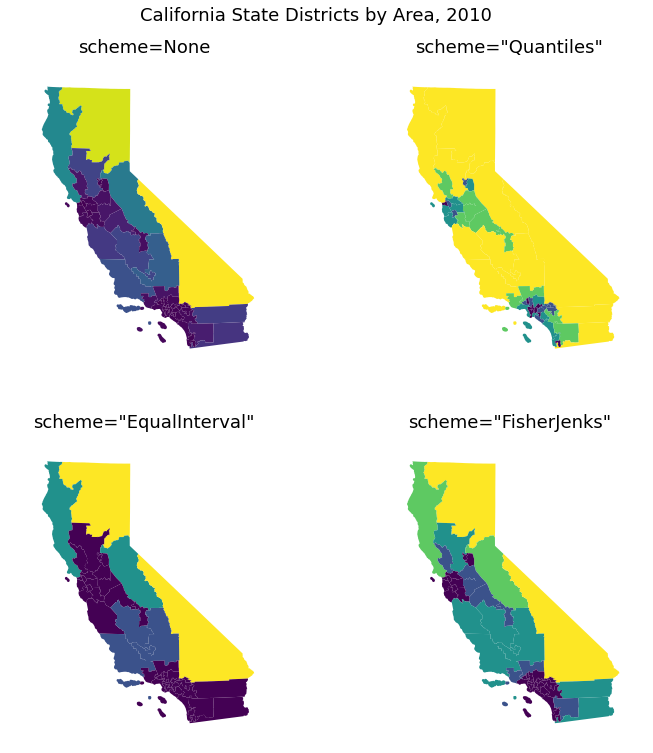

In [13]:
cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
cali['area'] =cali.geometry.area

proj=gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944)
fig, axarr = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': proj})

gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=None, ax=axarr[0][0]
)
axarr[0][0].set_title('scheme=None', fontsize=18)

scheme = mc.Quantiles(cali.area, k=5)
gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=scheme, ax=axarr[0][1]
)
axarr[0][1].set_title('scheme="Quantiles"', fontsize=18)

scheme = mc.EqualInterval(cali.area, k=5)
gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=scheme, ax=axarr[1][0]
)
axarr[1][0].set_title('scheme="EqualInterval"', fontsize=18)

scheme = mc.FisherJenks(cali.area, k=5)
gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=scheme, ax=axarr[1][1]
)
axarr[1][1].set_title('scheme="FisherJenks"', fontsize=18)

plt.subplots_adjust(top=0.92)
plt.suptitle('California State Districts by Area, 2010', fontsize=18)

## Spatial Merge

Subset to Africa

<AxesSubplot:>

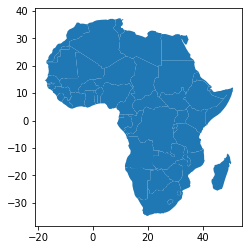

In [14]:
afr = countries.loc[countries.CONTINENT == 'Africa']
afr.plot()

Subset cities by merging with African boundaries

In [15]:
afr_cities = gpd.sjoin(cities, afr, how='inner')

In [17]:
afr_cities.head()

,SCALERANK,NATSCALE,LABELRANK_left,FEATURECLA,NAME_left,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_VN_right,FCLASS_TR_right,FCLASS_ID_right,FCLASS_PL_right,FCLASS_GR_right,FCLASS_IT_right,FCLASS_NL_right,FCLASS_SE_right,FCLASS_BD_right,FCLASS_UA_right
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,Lobamba,0,Legislative and,...,None,None,None,None,None,None,None,None,None,None
16,4,50,8,Admin-0 capital,Mbabane,None,None,Mbabane,1,Administrative,...,None,None,None,None,None,None,None,None,None,None
9,6,30,0,Admin-0 capital alt,Bir Lehlou,None,None,Bir Lehlou,0,Claimed as inte,...,None,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None
15,4,50,0,Admin-0 capital,Kigali,None,None,Kigali,1,None,...,None,None,None,None,None,None,None,None,None,None
17,4,50,5,Admin-0 capital,Juba,None,None,Juba,0,None,...,None,None,None,None,None,None,None,None,None,None


## Distance Calculations

In [18]:
rivers = gpd.read_file('data/ne_110m_rivers_lake_centerlines.zip')

In [19]:
rivers.geometry.head()

0    LINESTRING (82.40048 30.41148, 82.72273 30.365...
1    LINESTRING (94.08400 33.15586, 94.44770 33.163...
2    LINESTRING (90.32537 47.65017, 90.20052 47.408...
3    LINESTRING (-124.83563 56.75692, -124.20045 56...
4    LINESTRING (8.21979 48.04681, 8.55336 47.98082...
Name: geometry, dtype: geometry

<AxesSubplot:>

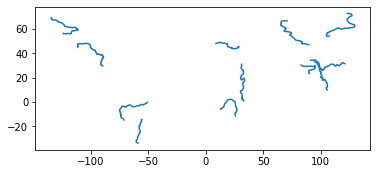

In [20]:
rivers.plot()

In [21]:
def min_distance(point, lines = rivers):
    return lines.distance(point).min()

afr_cities['min_dist_to_rivers'] = afr_cities.geometry.apply(min_distance)

/tmp/ipykernel_164389/1484976562.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.distance(point).min()
/tmp/ipykernel_164389/1484976562.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.distance(point).min()
/tmp/ipykernel_164389/1484976562.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.distance(point).min()
/tmp/ipykernel_164389/1484976562.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this opera

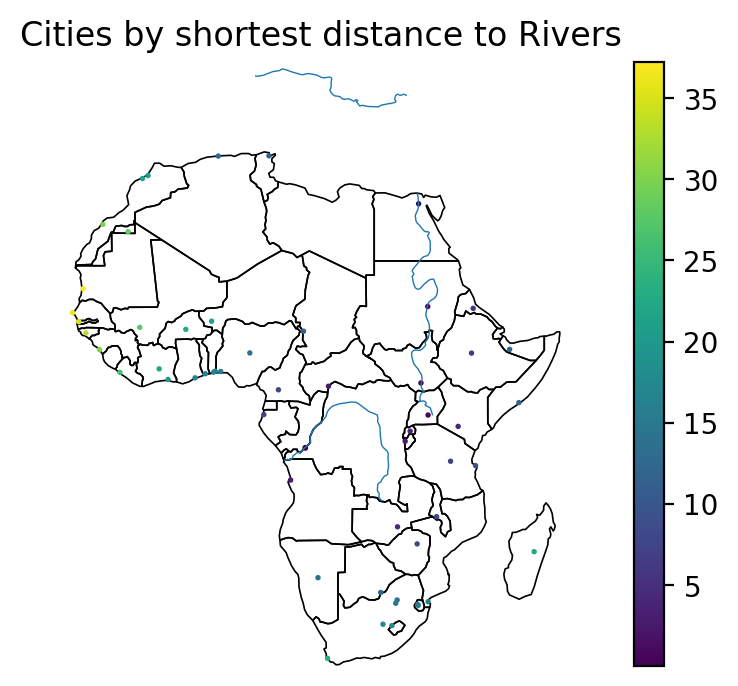

In [23]:
f, ax = plt.subplots(dpi = 200)
afr.plot(edgecolor = 'k', facecolor = 'None', linewidth = 0.6, ax = ax)
rivers.plot(ax = ax, linewidth = 0.5)
afr_cities.plot(column = 'min_dist_to_rivers', markersize = 0.9, ax = ax, legend = True)
ax.set_ylim(-35, 50)
ax.set_xlim(-20, 55)
ax.set_title('Cities by shortest distance to Rivers')
ax.set_axis_off()

## Buffers

In [24]:
afr_cities_buf = afr_cities.buffer(1)

/tmp/ipykernel_164389/1903745442.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  afr_cities_buf = afr_cities.buffer(1)


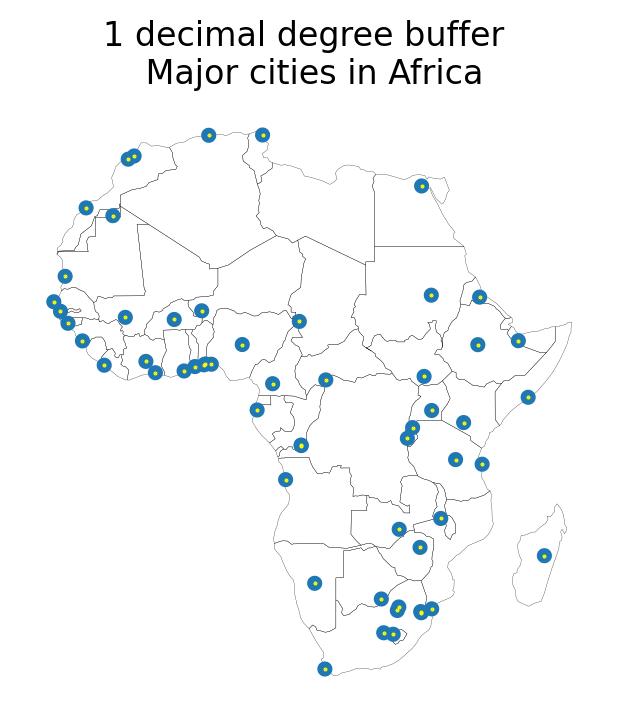

In [25]:
f, ax = plt.subplots(dpi = 200)
afr.plot(facecolor = 'None', edgecolor = 'k', linewidth = 0.1, ax = ax)
afr_cities_buf.plot(ax=ax, linewidth=0)
afr_cities.plot(ax=ax, markersize=.2, color='yellow')
ax.set_title('1 decimal degree buffer \n Major cities in Africa', fontsize = 12)
ax.set_axis_off()

# Raster Data 

In [26]:
raster = 'data/res03_crav6190h_sihr_cer.tif'

In [27]:
# Get info on raster
NDV, xsize, ysize, GeoT, Projection, DataType = gr.get_geo_info(raster)

grow = gr.load_tiff(raster)
grow = gr.GeoRaster(grow, GeoT, projection = Projection)

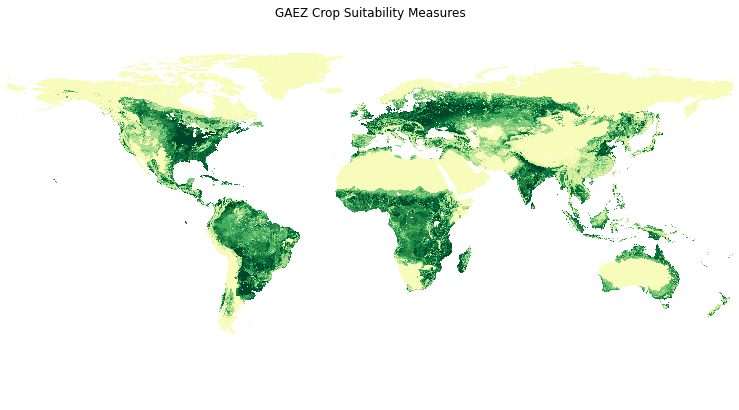

In [28]:
f, ax = plt.subplots(1, figsize=(13, 11))
grow.plot(ax = ax, cmap = 'YlGn_r')
ax.set_title('GAEZ Crop Suitability Measures')
ax.set_axis_off()

## Zonal Statistics 

In [31]:
murdock = gpd.read_file('https://scholar.harvard.edu/files/nunn/files/murdock_shapefile.zip')

In [32]:
murdock_cs = gpd.GeoDataFrame.from_features((zonal_stats(murdock, raster, geojson_out = True)))

/home/alal/anaconda3/envs/geo_env/lib/python3.10/site-packages/geoplot/geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(
/home/alal/anaconda3/envs/geo_env/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


Text(0.5, 1.0, 'Crop Suitability by Homeland \n Murdock Atlas')

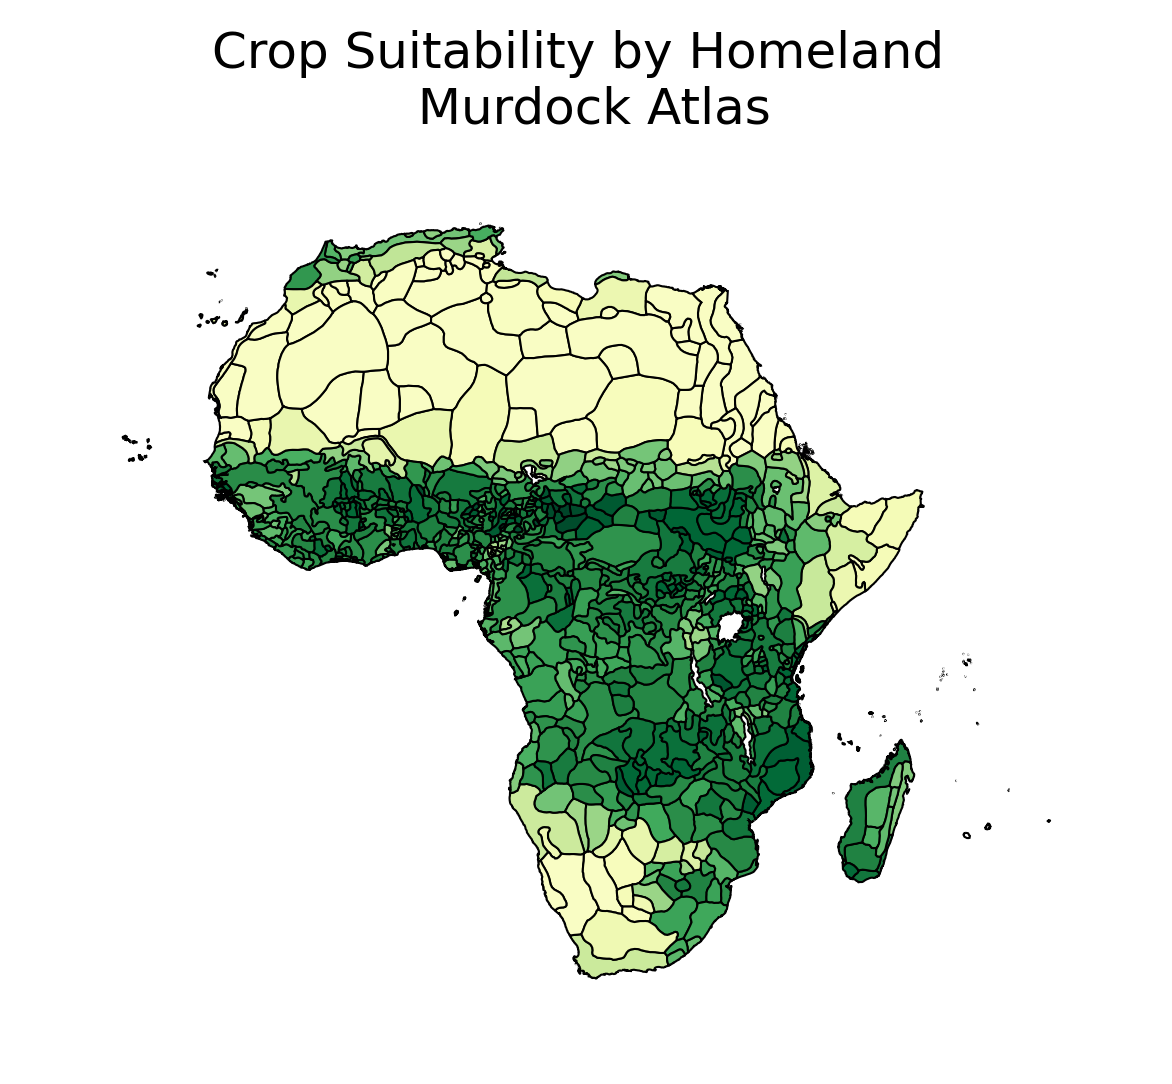

In [33]:
f, ax = plt.subplots(dpi = 300)
gplt.choropleth(
    murdock_cs, hue='mean', linewidth=.5, cmap='YlGn_r', ax=ax
)
ax.set_title('Crop Suitability by Homeland \n Murdock Atlas', fontsize = 12)

# Spatial Econometrics 

## Weight Matrices

In [35]:
%time w = Queen.from_dataframe(murdock_cs)

CPU times: user 548 ms, sys: 11.3 ms, total: 559 ms
Wall time: 564 ms


/home/alal/anaconda3/envs/geo_env/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 65 disconnected components.
 There are 63 islands with ids: 8, 18, 21, 38, 56, 60, 67, 100, 103, 110, 127, 130, 134, 144, 153, 154, 179, 186, 197, 201, 249, 266, 267, 281, 286, 294, 298, 314, 335, 364, 391, 397, 462, 469, 480, 481, 549, 557, 562, 571, 619, 632, 634, 643, 653, 665, 667, 678, 682, 685, 691, 727, 749, 757, 781, 787, 789, 790, 791, 792, 793, 800, 832.
  warnings.warn(message)


In [36]:
w.n
w.mean_neighbors

5.029655990510083

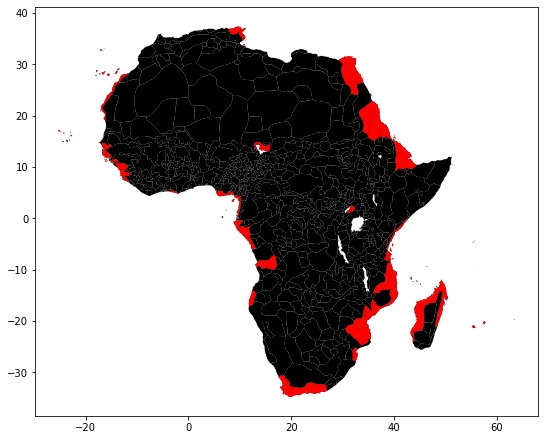

In [37]:
ax = murdock_cs.plot(color='k', figsize=(9, 9))
murdock_cs.loc[w.islands, :].plot(color='red', ax=ax);

In [38]:
mur = murdock_cs.drop(w.islands)

In [39]:
w.transform = 'r'

('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 144, ' is an island (no neighbors)')
('WARNING: ', 153, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')
('WARNING: ', 179, ' is an island (no neighbors)')
('WARNING: ', 186, ' is an island (no neighbors)')
('WARNING: ', 197, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no n